In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

In [7]:
df_2015_q2 = pd.read_csv('../Data/TripData/trip_data_2015Q2.csv')
stations_centract_df = pd.read_csv('../Data/stations_census_tracts.csv')

In [8]:
df_2015_q2.columns

Index(['Trip id', 'Starttime', 'Stoptime', 'Bikeid', 'Tripduration',
       'From station id', 'From station name', 'To station id',
       'To station name', 'Usertype'],
      dtype='object')

In [ ]:
df_2015_q2 = df_2015_q2.rename(columns={'Trip id': 'Tripid', 'From station id': 'From_station_id',
                                       'From station name': 'From_station_name', 'To station id': 
                                       'To_station_id', 'To station name': 'To_station_name'})
df_2015_q2.head(1)

In [ ]:
stations_centract_df.columns

In [ ]:
stations_centract_df.loc[0]['tractce10'].dtype

In [3]:
stations_centract_df = stations_centract_df.rename(columns={'Station #': 'station_id'})
stations_centract_df.head(2)

,station_id,Station_Name,NumRacks,Latitude,Longitude,coordinates,tractce10
0,1000,Liberty Ave & Stanwix St,16,40.441326,-80.004679,POINT (-80.004679 40.441326),20100
1,1001,Forbes Ave & Market Square,19,40.440877,-80.003080,POINT (-80.00308 40.440877),20100


In [ ]:
type(stations_centract_df.loc[0]['tractce10'])

In [4]:
stations_centract_df["tractce10"]= stations_centract_df["tractce10"].astype(str)

In [5]:
for i in range(len(stations_centract_df)):
    if len(stations_centract_df.loc[i]['tractce10']) == 5:
        stations_centract_df.at[i, 'tractce10'] = '0' + stations_centract_df.loc[i]['tractce10']

stations_centract_df

,station_id,Station_Name,NumRacks,Latitude,Longitude,coordinates,tractce10
0,1000,Liberty Ave & Stanwix St,16,40.441326,-80.004679,POINT (-80.004679 40.441326),020100
1,1001,Forbes Ave & Market Square,19,40.440877,-80.003080,POINT (-80.00308 40.440877),020100
2,1002,Third Ave & Wood St,15,40.439030,-80.001860,POINT (-80.00185999999999 40.43903),020100
3,1003,First Ave & Smithfield St (Art Institute),15,40.437200,-80.000375,POINT (-80.00037500000001 40.4372),020100
4,1004,First Ave & B St (T Station),15,40.435887,-79.997102,POINT (-79.997102 40.435887),020100
...,...,...,...,...,...,...,...
95,49781,Fifth Ave & Miltenberger,6,40.438296,-79.981177,POINT (-79.98117685 40.43829598),010300
96,49801,Microsoft,6,40.453797,-79.990940,POINT (-79.99094009 40.45379691),240600
97,49881,Arch St & Jacksonia St,5,40.457773,-80.009458,POINT (-80.00945806999999 40.45777261),250300
98,49921,W General Robinson St & Chuck Noll Way,5,40.447412,-80.012065,POINT (-80.01206517 40.44741245),981200


In [ ]:
df_2015_q2.insert(7, "from_census_tract", "0")

In [ ]:
df_2015_q2.insert(10, "to_census_tract", "0")
df_2015_q2.head(1)

In [6]:
#get the 2010 census tract neighborhoods in Pittsburgh
cenTract = gpd.read_file('../Data/2010_Census_Tracts/a36fc9b1-4e53-4fd1-80fb-db1554e213422020328-1-nbfxcj.l6b8.shp')


#find the centroids of each neighborhood for labeling
cenTract["center"] = cenTract["geometry"].centroid
map_points = cenTract.copy()
map_points.set_geometry("center", inplace = True)

centract_dict = dict(zip(stations_centract_df.station_id, stations_centract_df.tractce10))   

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [ ]:
centract_dict.get(49951)
#return the census tract
#parameter is the station id

In [ ]:
for i in range(len(df_2015_q2)):
    from_station = df_2015_q2.loc[i]['From_station_id']
    
    if from_station == 1050:
        df_2015_q2.at[i, 'from_census_tract'] = "0"
    else:
        df_2015_q2.at[i, 'from_census_tract'] = centract_dict.get(from_station)
    
    to_station = df_2015_q2.loc[i]['To_station_id']
    
    if to_station == 1050:
        df_2015_q2.at[i, 'to_census_tract'] = "0"
    else:
        df_2015_q2.at[i, 'to_census_tract'] = centract_dict.get(to_station)

df_2015_q2.to_csv('../Data/TripData/trip_data_2015Q2_ct.csv')

In [ ]:
# df_2015_q2 = pd.read_csv('../Data/TripData/trip_data_2015Q2_ct.csv')
for i in range(len(df_2015_q2)):
    if pd.isna(df_2015_q2.loc[i]['to_census_tract']):
        df_2015_q2.at[i, 'to_census_tract'] = "0"
        
    if pd.isna(df_2015_q2.loc[i]['from_census_tract']):
        df_2015_q2.at[i, 'from_census_tract'] = "0"    

In [ ]:
# df_2015_q2 = df_2015_q2.reset_index()

In [ ]:
df_2015_q2

In [ ]:
inflow = centract_dict.copy()
inflow = {value:0 for key, value in inflow.items()}
outflow = inflow.copy()

inflow['0'] = 0
outflow['0'] = 0

for i in range(len(df_2015_q2)):
#     if df_2015_q2.loc[i]['to_census_tract'] is not '0':
#     print("census tract " + df_2015_q2.loc[i]['to_census_tract'])
#     print("inflow amt " + str(inflow[df_2015_q2.loc[i]['to_census_tract']]))
    inflow[df_2015_q2.loc[i]['to_census_tract']] += 1
    outflow[df_2015_q2.loc[i]['from_census_tract']] += 1
#     print("inflow amt " + str(inflow[df_2015_q2.loc[i]['to_census_tract']]))

for i in range(len(cenTract)):
    if cenTract.loc[i]['tractce10'] not in inflow.keys():
        inflow[cenTract.loc[i]['tractce10']] = 0
        
    if cenTract.loc[i]['tractce10'] not in outflow.keys():
        outflow[cenTract.loc[i]['tractce10']] = 0

In [ ]:
inflow_df = pd.DataFrame.from_dict(inflow, orient='index', columns=['inflow_count'])
inflow_df = inflow_df.reset_index()
inflow_df = inflow_df.rename(columns = {'index': 'tractce10'})


outflow_df = pd.DataFrame.from_dict(outflow, orient='index', columns=['outflow_count'])
outflow_df = outflow_df.reset_index()
outflow_df = outflow_df.rename(columns = {'index': 'tractce10'})

In [ ]:
inflow_df

In [ ]:
outflow_df

In [ ]:
#prep two merge the geodataframe and the dataframe together
pdf = cenTract.merge(inflow_df, on='tractce10')
pdf = pdf.merge(outflow_df, on='tractce10')

for i in range(len(pdf)):
    if pd.isna(pdf.loc[i]['inflow_count']):
        pdf.at[i, 'inflow_count'] = 0   
    if pd.isna(pdf.loc[i]['outflow_count']):
        pdf.at[i, 'outflow_count'] = 0   

In [ ]:
#plot the neighborhood ids on the map
ax = pdf.plot(column="inflow_count", cmap='BuPu', figsize = (15, 12), edgecolor = "grey", 
              linewidth = 0.5, legend = True, legend_kwds={'label': "Inflow 2015 Q2",'orientation': "vertical"})
# texts = []

# for x, y, label in zip(map_points.geometry.x, map_points.geometry.y, pdf['inflow_count']):
#     texts.append(plt.text(x, y, label, fontsize = 8))

In [ ]:
#plot the neighborhood ids on the map
ax = pdf.plot(column="outflow_count", cmap='BuPu', figsize = (15, 12), edgecolor = "grey", 
              linewidth = 0.5, legend = True, legend_kwds={'label': "Outflow 2015 Q2",'orientation': "vertical"})

### Cumulative outflow and inflow for the last 5 years

Import data sets

In [124]:
stations_centract_df = pd.read_csv('../Data/stations_census_tracts.csv')

#get the 2010 census tract neighborhoods in Pittsburgh
cenTract = gpd.read_file('../Data/2010_Census_Tracts/a36fc9b1-4e53-4fd1-80fb-db1554e213422020328-1-nbfxcj.l6b8.shp')


#find the centroids of each neighborhood for labeling
cenTract["center"] = cenTract["geometry"].centroid
map_points = cenTract.copy()
map_points.set_geometry("center", inplace = True)

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [125]:
from pathlib import Path

#set path to access all json files in January folder
data_dir = Path('../Data') / 'TripData'
data_files = data_dir.glob('*.csv')

list_df = []

for file in data_files:
    print(file)
    df = pd.read_csv(file, low_memory=False)
#     print(df.columns)
    list_df.append(df)
    
final_df = pd.concat(list_df, ignore_index=True)

../Data/TripData/trip_data_2016Q4.csv
../Data/TripData/trip_data_2016Q1.csv
../Data/TripData/trip_data_2016Q3.csv
../Data/TripData/trip_data_2016Q2.csv
../Data/TripData/trip_data_2017Q4.csv
../Data/TripData/trip_data_2015Q4.csv
../Data/TripData/trip_data_2017Q3.csv
../Data/TripData/trip_data_2017Q2.csv
../Data/TripData/trip_data_2015Q2.csv
../Data/TripData/trip_data_2015Q3.csv
../Data/TripData/trip_data_2017Q1.csv
../Data/TripData/trip_data_2019Q3.csv
../Data/TripData/trip_data_2019Q2.csv
../Data/TripData/trip_data_2020Q4.csv
../Data/TripData/trip_data_2019Q1.csv
../Data/TripData/trip_data_2020Q1.csv
../Data/TripData/trip_data_2019Q4.csv
../Data/TripData/trip_data_2020Q2.csv
../Data/TripData/trip_data_2020Q3.csv
../Data/TripData/trip_data_2018Q1.csv
../Data/TripData/trip_data_2018Q3.csv
../Data/TripData/trip_data_2018Q2.csv
../Data/TripData/trip_data_2018Q4.csv


#### Counting outflow first

In [126]:
final_df = final_df.rename(columns = {'From station id' : 'from_station_id', 'To station id': 'to_station_id'})
final_df = final_df[final_df['Tripduration'] > 60.0] #tripduration is in seconds. We want to filter out trips that were less than 1 minute

In [127]:
final_df = final_df.drop(columns=['Usertype', 'Starttime', 'Stoptime', 'Bikeid', 'From station name', 'To station name'])

### combine station id with tract number

In [128]:
tract_station = stations_centract_df.drop(columns=['Station_Name', 'NumRacks'])
tract_station = tract_station.rename(columns={'Station #':'station_id'})

In [129]:
#fix tract number for PGH
def fixtract(df, column):
    for row, col in df.iterrows():
        #fix census tract number
        tract = df.loc[row][column]
        if len(tract) < 6:
            tract = '0' + tract
        df.at[row, column] = tract
        
    return df

In [130]:
outflow_df = final_df.groupby('from_station_id').count()
outflow_df = outflow_df.drop(columns=['to_station_id', 'Tripduration'])
outflow_df = outflow_df.reset_index()
outflow_df['from_station_id'] = outflow_df['from_station_id'].astype(int)
outflow_df = outflow_df.rename(columns={'from_station_id': 'station_id', 'Trip id':'outflow_count'})
outflow_df = outflow_df.merge(tract_station, on='station_id')
outflow_df['tractce10'] = outflow_df['tractce10'].astype(str)
outflow_df = fixtract(outflow_df, 'tractce10')
outflow_df.to_csv('../Data/PGH/outflow_pgh.csv')
outflow_df

,station_id,outflow_count,Latitude,Longitude,coordinates,tractce10
0,1000,23667,40.441326,-80.004679,POINT (-80.004679 40.441326),020100
1,1001,19564,40.440877,-80.003080,POINT (-80.00308 40.440877),020100
2,1002,7359,40.439030,-80.001860,POINT (-80.00185999999999 40.43903),020100
3,1003,6594,40.437200,-80.000375,POINT (-80.00037500000001 40.4372),020100
4,1004,8370,40.435887,-79.997102,POINT (-79.997102 40.435887),020100
...,...,...,...,...,...,...
95,49781,366,40.438296,-79.981177,POINT (-79.98117685 40.43829598),010300
96,49801,2165,40.453797,-79.990940,POINT (-79.99094009 40.45379691),240600
97,49881,782,40.457773,-80.009458,POINT (-80.00945806999999 40.45777261),250300
98,49921,1564,40.447412,-80.012065,POINT (-80.01206517 40.44741245),981200


In [131]:
inflow_df = final_df.groupby('to_station_id').count()
inflow_df = inflow_df.drop(columns=['from_station_id','Tripduration'])
inflow_df = inflow_df.reset_index()
inflow_df['to_station_id'] = inflow_df['to_station_id'].astype(int)
inflow_df = inflow_df.rename(columns={'to_station_id': 'station_id', 'Trip id': 'inflow_count'})
inflow_df = inflow_df.merge(tract_station, on='station_id')
inflow_df['tractce10'] = inflow_df['tractce10'].astype(str)
inflow_df = fixtract(inflow_df, 'tractce10')
inflow_df.to_csv('../Data/PGH/inflow_pgh.csv')
inflow_df

,station_id,inflow_count,Latitude,Longitude,coordinates,tractce10
0,1000,26845,40.441326,-80.004679,POINT (-80.004679 40.441326),020100
1,1001,22448,40.440877,-80.003080,POINT (-80.00308 40.440877),020100
2,1002,6681,40.439030,-80.001860,POINT (-80.00185999999999 40.43903),020100
3,1003,6517,40.437200,-80.000375,POINT (-80.00037500000001 40.4372),020100
4,1004,8063,40.435887,-79.997102,POINT (-79.997102 40.435887),020100
...,...,...,...,...,...,...
95,49781,287,40.438296,-79.981177,POINT (-79.98117685 40.43829598),010300
96,49801,2194,40.453797,-79.990940,POINT (-79.99094009 40.45379691),240600
97,49881,534,40.457773,-80.009458,POINT (-80.00945806999999 40.45777261),250300
98,49921,1522,40.447412,-80.012065,POINT (-80.01206517 40.44741245),981200


In [139]:
outflow_dict = {}
inflow_dict = {}
for row,col in outflow_df.iterrows():
    stationid = outflow_df.loc[row]['station_id']
    outflow = outflow_df.loc[row]['outflow_count']
    tract = outflow_df.loc[row]['tractce10']
    if tract not in outflow_dict.keys():
        outflow_dict[tract] = outflow
    else:
        outflow_dict[tract] += outflow

    ######################################
    stationid_in = inflow_df.loc[row]['station_id']
    inflow = inflow_df.loc[row]['inflow_count']
    tractin = inflow_df.loc[row]['tractce10']
    if tractin not in inflow_dict.keys():
        inflow_dict[tractin] = inflow
    else:
        inflow_dict[tractin] += inflow

In [140]:
cenTract['outflow'] = 0
for row, col in cenTract.iterrows():
    if cenTract.loc[row]['tractce10'] in outflow_dict.keys():
        cenTract.at[row, 'outflow'] = outflow_dict[cenTract.loc[row]['tractce10']]
    else:
        cenTract.at[row, 'outflow'] = 0
        
cenTract['inflow'] = 0
for row, col in cenTract.iterrows():
    if cenTract.loc[row]['tractce10'] in inflow_dict.keys():
        cenTract.at[row, 'inflow'] = inflow_dict[cenTract.loc[row]['tractce10']]
    else:
        cenTract.at[row, 'inflow'] = 0

Text(0.5, 1.0, 'Outflow for Healthy Ride Bike Stations 2015-2020')

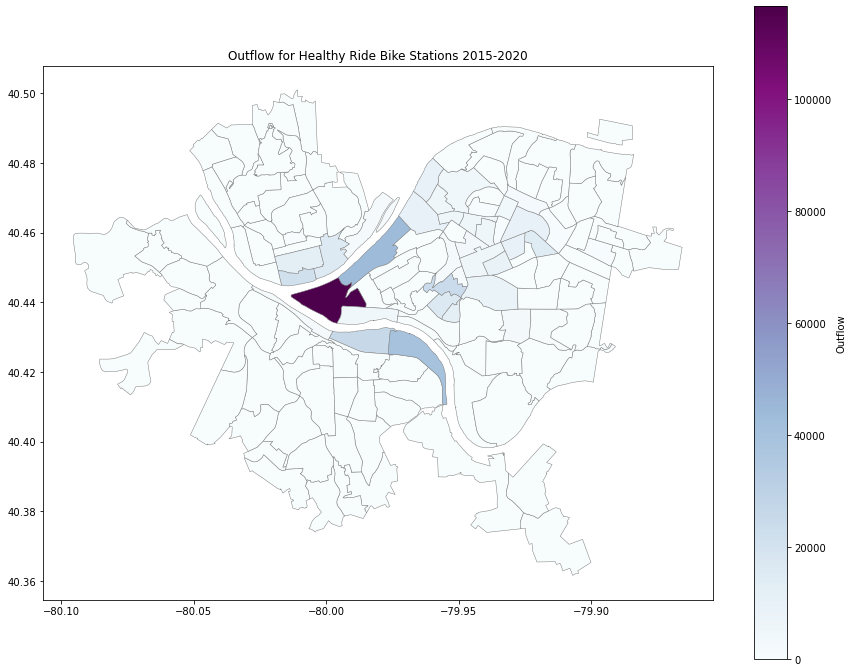

In [142]:
ax = cenTract.plot(column="outflow", cmap='BuPu', figsize = (15, 12), edgecolor = "grey", 
              linewidth = 0.5, legend = True, legend_kwds={'label': "Outflow",'orientation': "vertical"})
plt.title("Outflow for Healthy Ride Bike Stations 2015-2020")

Text(0.5, 1.0, 'Inflow for Healthy Ride Bike Stations 2015-2020')

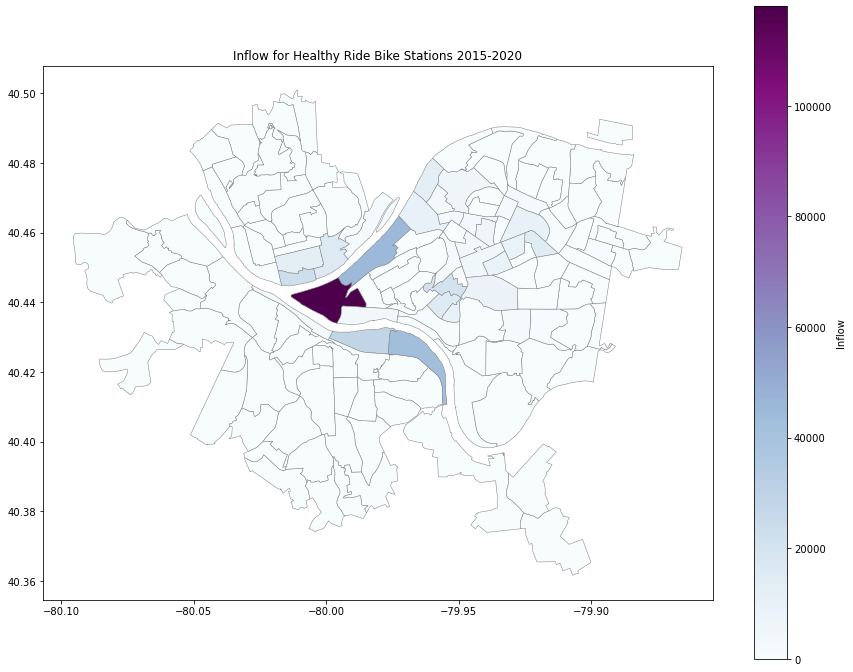

In [143]:
ax = cenTract.plot(column="inflow", cmap='BuPu', figsize = (15, 12), edgecolor = "grey", 
              linewidth = 0.5, legend = True, legend_kwds={'label': "Inflow",'orientation': "vertical"})
plt.title("Inflow for Healthy Ride Bike Stations 2015-2020")

In [183]:
outflow_tract = pd.DataFrame(outflow_dict.values(), index=outflow_dict.keys())

In [189]:
outflow_dict.to_JSON('../Data/PGH/outflow.json')

AttributeError: 'dict' object has no attribute 'to_JSON'

In [184]:
outflow_tract = outflow_tract.reset_index()
outflow_tract = outflow_tract.rename(columns={'index':'tractce10', 0:'outflow'})
outflow_tract

,tractce10,outflow
0,020100,116561
1,010300,4858
2,020300,44073
3,981200,21699
4,563200,15607
5,562700,13164
6,981000,4720
7,090100,9840
8,090200,5385
9,090300,5642


In [185]:
inflow_tract = pd.DataFrame(inflow_dict.values(), index=inflow_dict.keys())
inflow_tract = inflow_tract.reset_index()
inflow_tract = inflow_tract.rename(columns={'index':'tractce10', 0:'inflow'})
inflow_tract

,tractce10,inflow
0,020100,117959
1,010300,4235
2,020300,45411
3,981200,23250
4,563200,16419
5,562700,12596
6,981000,5779
7,090100,13184
8,090200,2772
9,090300,3573


In [186]:
flow_df = outflow_tract.merge(inflow_tract, on='tractce10')
flow_df

,tractce10,outflow,inflow
0,020100,116561,117959
1,010300,4858,4235
2,020300,44073,45411
3,981200,21699,23250
4,563200,15607,16419
5,562700,13164,12596
6,981000,4720,5779
7,090100,9840,13184
8,090200,5385,2772
9,090300,5642,3573


In [187]:
flow_df.to_csv('../Data/PGH/flows.csv')